In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 4

In [2]:
from AJ_ML_Library import models_classification

In [37]:
train = pd.read_csv('data/train_modified_5.csv')
test = pd.read_csv('data/test_modified_5.csv')

In [4]:
train.shape, test.shape

((7381, 187), (11171, 186))

In [5]:
train.columns

Index([u'fault_severity', u'id', u'location', u'event_type 10',
       u'event_type 11', u'event_type 13', u'event_type 14', u'event_type 15',
       u'event_type 18', u'event_type 2',
       ...
       u'resource_type 7', u'resource_type 8', u'resource_type 9',
       u'severity_type 1', u'severity_type 2', u'severity_type 3',
       u'severity_type 4', u'severity_type 5', u'location_count',
       u'feature_count'],
      dtype='object', length=187)

In [6]:
train['fault_severity'].value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [7]:
target = 'fault_severity'
IDcol = 'id'
output_colnames = ['predict_0','predict_1','predict_2']

## XGBOOST
### (Models with New XGBoost Definition)

In [8]:
models_classification = reload(models_classification)

In [9]:
predictors = [x for x in train.columns if x not in [target, IDcol]]

### Get the num_boost_round for 0.1 learning rate

Will train until cv error hasn't decreased in 20 rounds.
[0]	cv-test-mlogloss:1.0344306+0.00104361766946	cv-train-mlogloss:1.0328166+0.000996195482825
[1]	cv-test-mlogloss:0.9777744+0.00292160350493	cv-train-mlogloss:0.9745868+0.000879872354379
[2]	cv-test-mlogloss:0.9298634+0.00324233604674	cv-train-mlogloss:0.9255172+0.00162309413159
[3]	cv-test-mlogloss:0.8879136+0.00439540148792	cv-train-mlogloss:0.881565+0.00170575062656
[4]	cv-test-mlogloss:0.851758+0.00510777278273	cv-train-mlogloss:0.8438172+0.000614744629907
[5]	cv-test-mlogloss:0.8194148+0.00501688506546	cv-train-mlogloss:0.810061+0.0014007112479
[6]	cv-test-mlogloss:0.7917514+0.0058692411639	cv-train-mlogloss:0.781186+0.00135329922781
[7]	cv-test-mlogloss:0.7668092+0.00663162837921	cv-train-mlogloss:0.7548746+0.00125871531333
[8]	cv-test-mlogloss:0.7453156+0.00670496009235	cv-train-mlogloss:0.732025+0.00208796982737
[9]	cv-test-mlogloss:0.726263+0.00628082265312	cv-train-mlogloss:0.711828+0.00308516845569
[10]	cv-test-mloglo

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': -1, 'max_delta_step': 0, 'nthread': 4, 'base_score': 0.5, 'n_estimators': 161, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 0, 'min_child_weight': 30, 'objective': 'multi:softprob', 'max_depth': 10, 'gamma': 0}


Stopping. Best iteration:
[160] cv-mean:0.5225198	cv-std:0.0145284343052


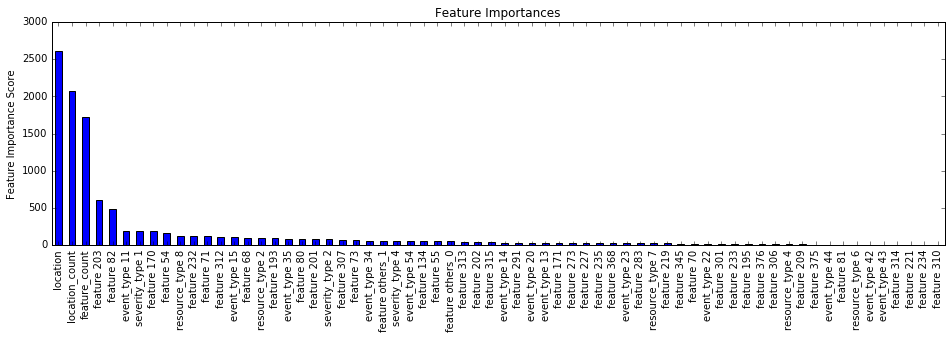


Model Report
Confusion Matrix:
col_0              0     1    2
fault_severity                 
0               4338   318  128
1                552  1222   97
2                 99    68  559
Note: rows - actual; col - predicted
Train (Accuracy) : 82.902%
Train (log_loss) : 0.411584
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [12]:
xgb1 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb1.set_parameters({
        'learning_rate':0.1,
        'n_estimators':500,
        'max_depth':10,
        'min_child_weight':30,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4
    })
xgb1.modelfit(useTrainCV=True,performCV=False)

Grid search on max_depth, min_child_weight

In [13]:
xgb2 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb2.set_parameters({
        'learning_rate':0.1,
        'n_estimators':160,
        'max_depth':10,
        'min_child_weight':30,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4
    })
param_test1 = {
    'max_depth':range(8,17,2),
    'min_child_weight':range(10,51,10)
}
xgb2.GridSearch(param_test1,n_jobs=4,iid=False,cv=5)

Grid Search Results:
    max_depth  min_child_weight    meanCV     stdCV
0           8                10 -0.512743  0.014759
1           8                20 -0.525427  0.014264
2           8                30 -0.528992  0.014982
3           8                40 -0.533505  0.015537
4           8                50 -0.543161  0.015469
5          10                10 -0.517766  0.016186
6          10                20 -0.526660  0.016570
7          10                30 -0.528865  0.015401
8          10                40 -0.532647  0.016037
9          10                50 -0.543071  0.015264
10         12                10 -0.520414  0.016009
11         12                20 -0.528005  0.016569
12         12                30 -0.528737  0.015739
13         12                40 -0.532931  0.015680
14         12                50 -0.543200  0.015545
15         14                10 -0.524376  0.017902
16         14                20 -0.528453  0.016665
17         14                30 -0.528629  

In [14]:
xgb3 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb3.set_parameters({
        'learning_rate':0.1,
        'n_estimators':160,
        'max_depth':10,
        'min_child_weight':30,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
    })
param_test2 = {
    'max_depth':range(4,7,2),
    'min_child_weight':range(4,10)
}
xgb3.GridSearch(param_test2,n_jobs=4,iid=False,cv=5)

Grid Search Results:
    max_depth  min_child_weight    meanCV     stdCV
0           4                 4 -0.514109  0.011421
1           4                 5 -0.514899  0.011665
2           4                 6 -0.517008  0.010828
3           4                 7 -0.517875  0.011415
4           4                 8 -0.518380  0.011010
5           4                 9 -0.520004  0.009846
6           6                 4 -0.505836  0.013300
7           6                 5 -0.506019  0.014053
8           6                 6 -0.507614  0.013086
9           6                 7 -0.509014  0.013086
10          6                 8 -0.510541  0.013213
11          6                 9 -0.511569  0.012468

Best Parameters:  {'max_depth': 6, 'min_child_weight': 4}

Best Score:  -0.505835591859


In [15]:
xgb4 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb4.set_parameters({
        'learning_rate':0.1,
        'n_estimators':160,
        'max_depth':6,
        'min_child_weight':4,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
    })
param_test3 = {
    'min_child_weight':range(1,4)
}
xgb4.GridSearch(param_test3,n_jobs=4,iid=False,cv=5)

Grid Search Results:
   min_child_weight    meanCV     stdCV
0                 1 -0.500348  0.014809
1                 2 -0.502914  0.014264
2                 3 -0.503665  0.014547

Best Parameters:  {'min_child_weight': 1}

Best Score:  -0.500348089633


Will train until cv error hasn't decreased in 20 rounds.
[0]	cv-test-mlogloss:1.0343588+0.000844595145617	cv-train-mlogloss:1.0309852+0.000882871089118
[1]	cv-test-mlogloss:0.9780442+0.00255723173764	cv-train-mlogloss:0.9715982+0.00062415780056
[2]	cv-test-mlogloss:0.931306+0.00283744969999	cv-train-mlogloss:0.9222048+0.0017009317917
[3]	cv-test-mlogloss:0.8892404+0.00312929337711	cv-train-mlogloss:0.8772306+0.00179046101326
[4]	cv-test-mlogloss:0.8535446+0.00403148476867	cv-train-mlogloss:0.8384972+0.00119412418115
[5]	cv-test-mlogloss:0.8212824+0.0033658873778	cv-train-mlogloss:0.8035444+0.00244538312745
[6]	cv-test-mlogloss:0.7938102+0.00319551769828	cv-train-mlogloss:0.7737068+0.0028053064289
[7]	cv-test-mlogloss:0.7687726+0.00405970395965	cv-train-mlogloss:0.7461838+0.00258913988807
[8]	cv-test-mlogloss:0.7473754+0.00426367872148	cv-train-mlogloss:0.7225108+0.00309583186882
[9]	cv-test-mlogloss:0.7283534+0.00367330094602	cv-train-mlogloss:0.7012352+0.00391485414288
[10]	cv-test-ml

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': -1, 'max_delta_step': 0, 'nthread': 4, 'base_score': 0.5, 'n_estimators': 162, 'subsample': 0.8, 'reg_lambda': 1, 'seed': 0, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


Stopping. Best iteration:
[161] cv-mean:0.4985978	cv-std:0.015265694015


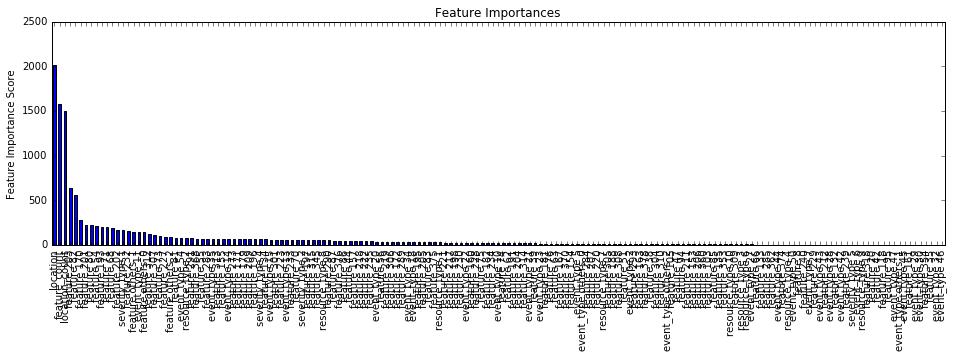


Model Report
Confusion Matrix:
col_0              0     1    2
fault_severity                 
0               4446   235  103
1                425  1378   68
2                 52    30  644
Note: rows - actual; col - predicted
Train (Accuracy) : 87.630%
Train (log_loss) : 0.339496
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [17]:
xgb4.set_parameters({
        'learning_rate':0.1,
        'n_estimators':300,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
    })
xgb4.modelfit(useTrainCV=True,performCV=False)

In [18]:
xgb4.submission_proba(IDcol=[IDcol], proba_colnames=output_colnames, filename='submissions/xgb4_mod5.csv')
#Score:0.50760

In [19]:
xgb5 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb5.set_parameters({
        'learning_rate':0.1,
        'n_estimators':161,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
    })
param_test4 = {
    'gamma':[x/10.0 for x in range(2,7,2)]
}
xgb5.GridSearch(param_test4,n_jobs=4,iid=False,cv=5)

Grid Search Results:
   gamma    meanCV     stdCV
0    0.2 -0.500966  0.016293
1    0.4 -0.501764  0.014507
2    0.6 -0.501806  0.015253

Best Parameters:  {'gamma': 0.2}

Best Score:  -0.50096597441


This is poorer than 0 so we'll keep it to 0
check for subsample next

In [20]:
xgb6 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb6.set_parameters({
        'learning_rate':0.1,
        'n_estimators':161,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
    })
param_test5 = {
    'subsample':[x/10.0 for x in range(5,10)],
    'colsample_bytree':[x/10.0 for x in range(5,10)]
}
xgb6.GridSearch(param_test5,n_jobs=4,iid=False,cv=5)

Grid Search Results:
    subsample  colsample_bytree    meanCV     stdCV
0         0.5               0.5 -0.503596  0.013773
1         0.6               0.5 -0.503141  0.014909
2         0.7               0.5 -0.500630  0.015009
3         0.8               0.5 -0.500713  0.015050
4         0.9               0.5 -0.500336  0.014178
5         0.5               0.6 -0.503615  0.015981
6         0.6               0.6 -0.501712  0.016389
7         0.7               0.6 -0.499947  0.015659
8         0.8               0.6 -0.499976  0.014911
9         0.9               0.6 -0.500703  0.015350
10        0.5               0.7 -0.505465  0.015938
11        0.6               0.7 -0.502071  0.017740
12        0.7               0.7 -0.500965  0.014358
13        0.8               0.7 -0.500026  0.014035
14        0.9               0.7 -0.501094  0.014411
15        0.5               0.8 -0.505394  0.017472
16        0.6               0.8 -0.501318  0.014999
17        0.7               0.8 -0.500036  

In [21]:
xgb7 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb7.set_parameters({
        'learning_rate':0.1,
        'n_estimators':161,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
    })
param_test6 = {
    'subsample':[0.65,0.75],
    'colsample_bytree':[0.55,0.65]
}
xgb7.GridSearch(param_test6,n_jobs=4,iid=False,cv=5)

Grid Search Results:
   subsample  colsample_bytree    meanCV     stdCV
0       0.65              0.55 -0.500509  0.014177
1       0.75              0.55 -0.500154  0.014156
2       0.65              0.65 -0.502741  0.014227
3       0.75              0.65 -0.500653  0.013829

Best Parameters:  {'subsample': 0.75, 'colsample_bytree': 0.55}

Best Score:  -0.500153940354


Will train until cv error hasn't decreased in 20 rounds.
[0]	cv-test-mlogloss:1.0923544+6.18080900853e-05	cv-train-mlogloss:1.0920606+9.73028262693e-05
[1]	cv-test-mlogloss:1.0861288+0.00019422811331	cv-train-mlogloss:1.085522+0.000153827175753
[2]	cv-test-mlogloss:1.0799512+0.000182869789741	cv-train-mlogloss:1.0790948+0.000254930108069
[3]	cv-test-mlogloss:1.0737664+0.000305568061158	cv-train-mlogloss:1.0726308+0.00032024140894
[4]	cv-test-mlogloss:1.067612+0.000479112095443	cv-train-mlogloss:1.0661786+0.000290689249887
[5]	cv-test-mlogloss:1.0613834+0.000557573170086	cv-train-mlogloss:1.0596456+0.000415184585456
[6]	cv-test-mlogloss:1.0555142+0.00073688191727	cv-train-mlogloss:1.0535182+0.000534897896799
[7]	cv-test-mlogloss:1.0495574+0.000941845125273	cv-train-mlogloss:1.0473006+0.000638545096293
[8]	cv-test-mlogloss:1.043836+0.0010097518507	cv-train-mlogloss:1.041268+0.000804954408647
[9]	cv-test-mlogloss:1.0384086+0.000914620052262	cv-train-mlogloss:1.0355858+0.000881077839921
[1

{'reg_alpha': 0, 'colsample_bytree': 0.6, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'missing': -1, 'max_delta_step': 0, 'nthread': 4, 'base_score': 0.5, 'n_estimators': 1810, 'subsample': 0.7, 'reg_lambda': 1, 'seed': 0, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


Stopping. Best iteration:
[1809] cv-mean:0.4946188	cv-std:0.0145252550325


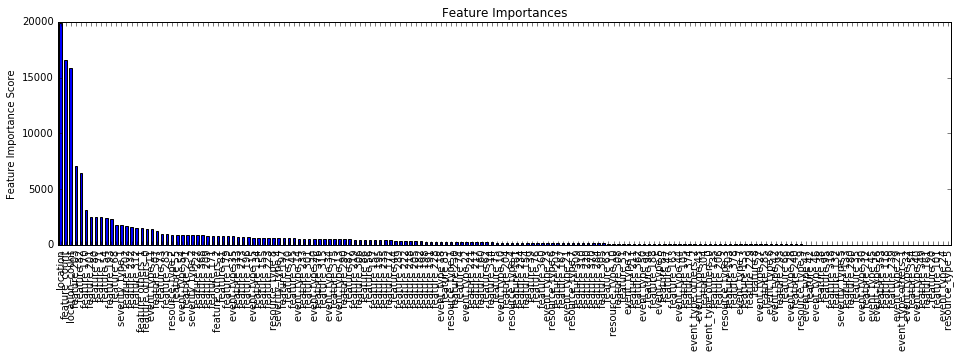


Model Report
Confusion Matrix:
col_0              0     1    2
fault_severity                 
0               4448   241   95
1                421  1381   69
2                 48    28  650
Note: rows - actual; col - predicted
Train (Accuracy) : 87.779%
Train (log_loss) : 0.336746
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [22]:
xgb8 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb8.set_parameters({
        'learning_rate':0.01,
        'n_estimators':2000,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.7,
        'colsample_bytree':0.6,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
    })
xgb8.modelfit(useTrainCV=True,performCV=False)

In [23]:
xgb8.submission_proba(IDcol=[IDcol], proba_colnames=output_colnames, filename='submissions/xgb8_mod5.csv')
#Score:0.50710

In [26]:
xgb8.export_model([IDcol])
#xgboost_2.csv

Will train until cv error hasn't decreased in 20 rounds.
[0]	cv-test-mlogloss:1.0381586+0.000626207824927	cv-train-mlogloss:1.0352014+0.000939218952109
[1]	cv-test-mlogloss:0.9859244+0.00179735100634	cv-train-mlogloss:0.9798658+0.00142741057864
[2]	cv-test-mlogloss:0.9404326+0.00200582946434	cv-train-mlogloss:0.931891+0.00226687758823
[3]	cv-test-mlogloss:0.899204+0.00241178846502	cv-train-mlogloss:0.888569+0.00265132706394
[4]	cv-test-mlogloss:0.8638374+0.00361259743675	cv-train-mlogloss:0.8504764+0.00239486447216
[5]	cv-test-mlogloss:0.8310724+0.00404367944328	cv-train-mlogloss:0.8152582+0.00319012660564
[6]	cv-test-mlogloss:0.8037516+0.00495127832383	cv-train-mlogloss:0.7856576+0.00345555787681
[7]	cv-test-mlogloss:0.7782268+0.00602182571651	cv-train-mlogloss:0.7580764+0.00354247769788
[8]	cv-test-mlogloss:0.756504+0.00622612801025	cv-train-mlogloss:0.7339176+0.00441271393136
[9]	cv-test-mlogloss:0.7379376+0.00558782915272	cv-train-mlogloss:0.7131836+0.00457289726978
[10]	cv-test-ml

{'reg_alpha': 0, 'colsample_bytree': 0.6, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': -1, 'max_delta_step': 0, 'nthread': 4, 'base_score': 0.5, 'n_estimators': 198, 'subsample': 0.7, 'reg_lambda': 1, 'seed': 0, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


Stopping. Best iteration:
[197] cv-mean:0.497006	cv-std:0.014934051386


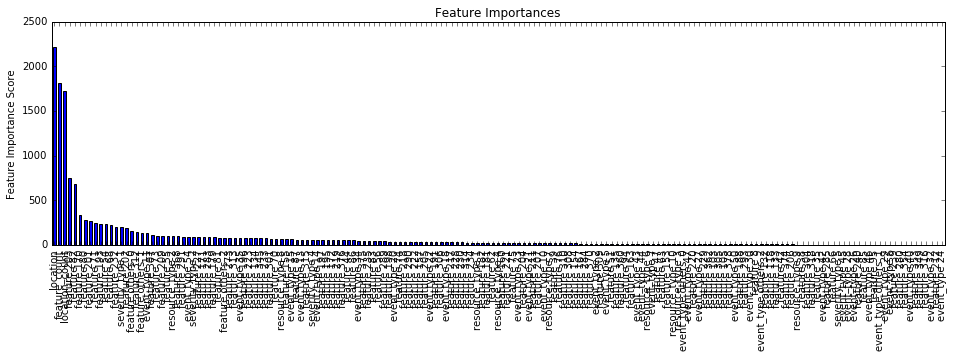


Model Report
Confusion Matrix:
col_0              0     1    2
fault_severity                 
0               4453   248   83
1                407  1399   65
2                 47    27  652
Note: rows - actual; col - predicted
Train (Accuracy) : 88.118%
Train (log_loss) : 0.328566
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [24]:
xgb9 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb9.set_parameters({
        'learning_rate':0.1,
        'n_estimators':250,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.7,
        'colsample_bytree':0.6,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
        'scale_pos_weight':1
    })
xgb9.modelfit(useTrainCV=True,performCV=False)

In [27]:
## Make features log:

In [28]:
feat_pred = [x for x in train if 'feature ' in x]
train[feat_pred].head()

,feature 101,feature 103,feature 105,feature 109,feature 118,feature 132,feature 133,feature 134,feature 135,feature 153,...,feature 82,feature 83,feature 85,feature 86,feature 87,feature 94,feature 95,feature others_0,feature others_1,feature others_2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,4,0,0


In [38]:
for col in feat_pred:
    train[col] = train[col].apply(lambda x: np.log(x) if x!=0 else 0)
    test[col] = test[col].apply(lambda x: np.log(x) if x!=0 else 0)

In [39]:
train[feat_pred].head()

,feature 101,feature 103,feature 105,feature 109,feature 118,feature 132,feature 133,feature 134,feature 135,feature 153,...,feature 82,feature 83,feature 85,feature 86,feature 87,feature 94,feature 95,feature others_0,feature others_1,feature others_2
0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,0.000000,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,0.000000,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,0.000000,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2.484907,0,0,0,0,0,0,0.000000,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,1.386294,0,0


Will train until cv error hasn't decreased in 20 rounds.
[0]	cv-test-mlogloss:1.0396662+0.00112214355588	cv-train-mlogloss:1.0363576+0.000813067426478
[1]	cv-test-mlogloss:0.9894556+0.00232262942374	cv-train-mlogloss:0.9831138+0.000834685904997
[2]	cv-test-mlogloss:0.9454636+0.0028263106411	cv-train-mlogloss:0.9368062+0.00160540367509
[3]	cv-test-mlogloss:0.9062174+0.00245944974334	cv-train-mlogloss:0.8952992+0.00206545582378
[4]	cv-test-mlogloss:0.8719998+0.00294907784909	cv-train-mlogloss:0.8583712+0.00216587796517
[5]	cv-test-mlogloss:0.8414634+0.00337099603085	cv-train-mlogloss:0.8255764+0.00294488238135
[6]	cv-test-mlogloss:0.8148084+0.0041004725874	cv-train-mlogloss:0.7968316+0.00369521174495
[7]	cv-test-mlogloss:0.7910006+0.00467651513843	cv-train-mlogloss:0.7709292+0.00320737770772
[8]	cv-test-mlogloss:0.7696452+0.0048803426683	cv-train-mlogloss:0.747524+0.00447993932995
[9]	cv-test-mlogloss:0.7515354+0.00484332888002	cv-train-mlogloss:0.727784+0.00453384785806
[10]	cv-test-mlo

{'reg_alpha': 0, 'colsample_bytree': 0.6, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': -1, 'max_delta_step': 0, 'nthread': 4, 'base_score': 0.5, 'n_estimators': 159, 'subsample': 0.7, 'reg_lambda': 1, 'seed': 0, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 6, 'gamma': 0}


Stopping. Best iteration:
[158] cv-mean:0.5291002	cv-std:0.0118428984864


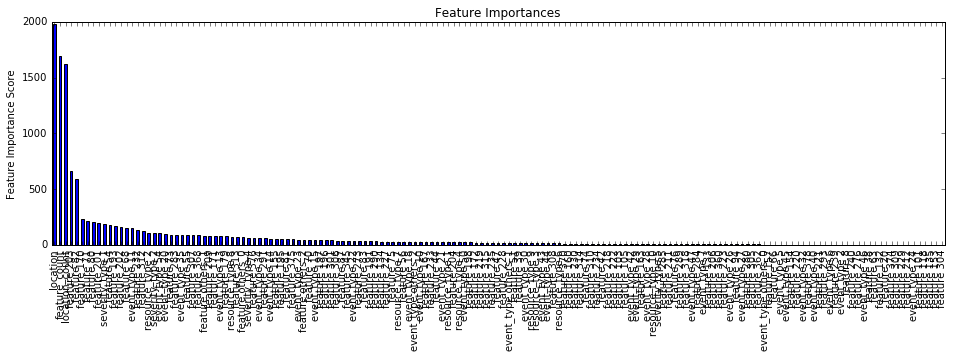


Model Report
Confusion Matrix:
col_0              0     1    2
fault_severity                 
0               4410   268  106
1                602  1200   69
2                 49    42  635
Note: rows - actual; col - predicted
Train (Accuracy) : 84.609%
Train (log_loss) : 0.387086
AUC : nan%
CV Score (Specified Metric) : Mean - 0.000000 | Std - 0.000000


In [40]:
xgb10 = models_classification.XGBoost_Class(train, test, target, predictors, cv_folds=5, 
                                           scoring_metric_skl='log_loss', scoring_metric_xgb='mlogloss')
xgb10.set_parameters({
        'learning_rate':0.1,
        'n_estimators':250,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.7,
        'colsample_bytree':0.6,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
        'missing':-1,
        'nthread':4,
        'scale_pos_weight':1
    })
xgb10.modelfit(useTrainCV=True,performCV=False)